In [89]:
import pandas as pd
import matplotlib.pyplot as plt
#http://www.data.jma.go.jp/gmd/risk/obsdl/#

df = pd.read_csv('data.csv', index_col='年月日', parse_dates=['年月日'])

In [257]:
weather = df[['最低気温(℃)', '最高気温(℃)', '降雪量合計(cm)', '日照時間(時間)']]
weather.columns = ['min_temp', 'temp', 's_dep', 'dl']
weather.index.names = ['dt']

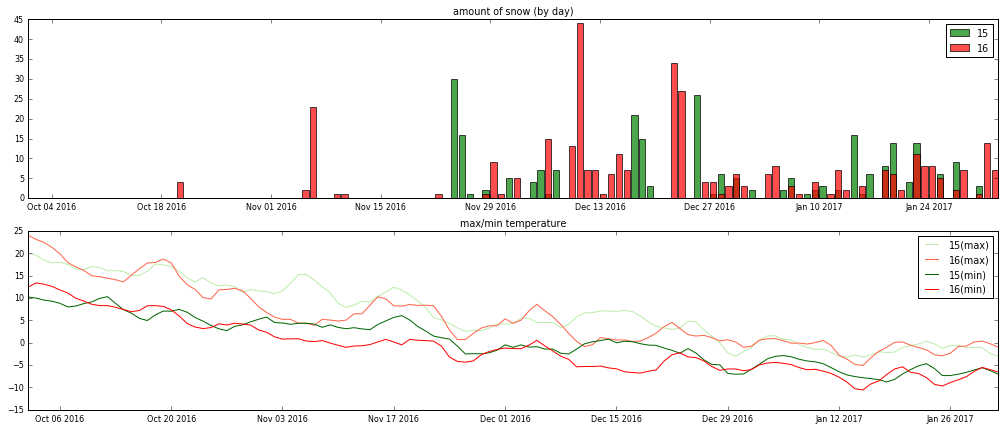

In [298]:
w16 = weather.loc['2016/10/1': '2017/2/1']
w15 = weather.loc['2015/10/1': '2016/2/1']

idx16 = w16.index
idx15 = w15.index

plt.figure(figsize=(14, 6))

plt.subplot(211)
plt.bar(idx16, w15['s_dep'],color='g',label='15', alpha=0.7)
plt.bar(idx16, w16['s_dep'],color='r',label='16', alpha=0.7)
plt.legend()
plt.title('amount of snow (by day)')


plt.subplot(212)
#plt.plot(idx16, w16['temp'], color='r')
#plt.plot(idx16, w15['temp'], color='g')
plt.plot(idx16, w15['temp'].rolling(window=5, min_periods=2).mean(), color='lightsage', label='15(max)')
plt.plot(idx16, w16['temp'].rolling(window=5, min_periods=2).mean(), color='tomato', label='16(max)')
plt.plot(idx16, w15['min_temp'].rolling(window=5, min_periods=2).mean(), color='darkgreen', label='15(min)')
plt.plot(idx16, w16['min_temp'].rolling(window=5, min_periods=2).mean(), color='red', label='16(min)')


plt.title('max/min temperature')


plt.legend()
plt.tight_layout()
plt.show()

In [278]:
for y, w in {'2015': w15, '2016': w16}.items():
    print(y)
    print(w.describe())
    print('sum s_dep: {}'.format(w['s_dep'].sum()))
    print('sum dl: {}'.format(w['dl'].sum()))

2015
         min_temp        temp       s_dep          dl
count  124.000000  124.000000  124.000000  124.000000
mean     0.132258    6.455645    2.000000    3.607258
std      5.699031    7.195903    5.068635    2.925086
min    -10.700000   -5.400000    0.000000    0.000000
25%     -4.500000    0.275000    0.000000    1.175000
50%      0.100000    5.500000    0.000000    3.200000
75%      4.500000   12.750000    1.000000    5.600000
max     11.700000   22.100000   30.000000   10.700000
sum s_dep: 248
sum dl: 447.3
2016
         min_temp        temp       s_dep          dl
count  124.000000  124.000000  124.000000  124.000000
mean    -1.355645    5.238710    2.854839    3.175806
std      6.112114    7.216475    6.443871    2.825907
min    -12.800000   -7.400000    0.000000    0.000000
25%     -6.025000   -0.400000    0.000000    0.500000
50%     -2.150000    3.300000    0.000000    2.700000
75%      1.800000   10.525000    3.000000    5.100000
max     15.300000   24.700000   44.000000  

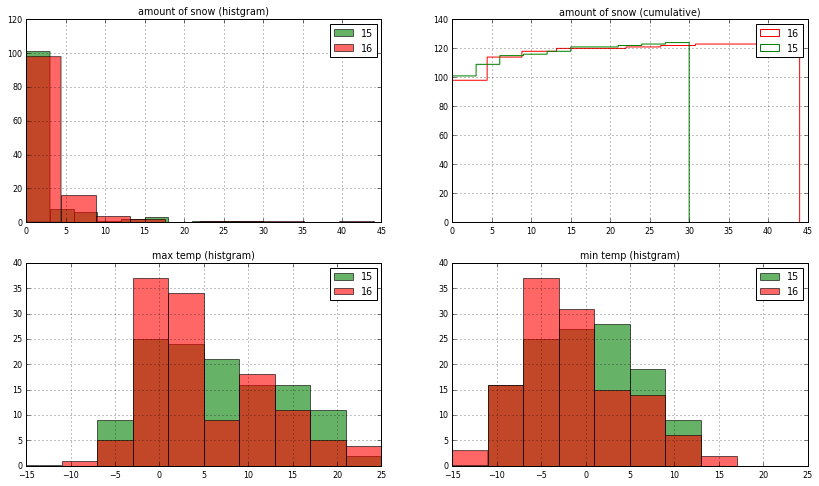

In [303]:
plt.figure(figsize=(14,8))


plt.subplot(221)
w15['s_dep'].hist(cumulative=False,color='g',alpha=0.6,label='15')
w16['s_dep'].hist(cumulative=False,color='r',alpha=0.6,label='16')
plt.title('amount of snow (histgram)')
plt.legend()


plt.subplot(222)
w16['s_dep'].hist(cumulative=True,color='r',alpha=1,label='16',histtype='step')
w15['s_dep'].hist(cumulative=True,color='g',alpha=1,label='15',histtype='step')
plt.title('amount of snow (cumulative)')
plt.legend()

plt.subplot(223)
w15['temp'].hist(cumulative=False,color='g',alpha=0.6,label='15', range=(-15,25))
w16['temp'].hist(cumulative=False,color='r',alpha=0.6,label='16', range=(-15,25))
plt.title('max temp (histgram)')
plt.legend()

plt.subplot(224)
w15['min_temp'].hist(cumulative=False,color='g',alpha=0.6,label='15', range=(-15,25))
w16['min_temp'].hist(cumulative=False,color='r',alpha=0.6,label='16', range=(-15,25))
plt.title('min temp (histgram)')
plt.legend()



plt.show()



In [290]:
for y,d in {'2015': w15, '2016': w16}.items():
    print(y + '年')
    print('最高気温 <= 0 {}'.format(d[d.temp<= 0].count()['temp']))
    print('最高気温 <= -5: {}'.format(d[d.min_temp<= -10].count()['temp']))
    print('最高気温 <= -10: {}'.format(d[d.min_temp<= -10].count()['temp']))
    print('最高気温 <= -15: {}'.format(d[d.min_temp<= -15].count()['temp']))    


2015年
最高気温 <= 0 27
最高気温 <= -5: 1
最高気温 <= -10: 1
最高気温 <= -15: 0
2016年
最高気温 <= 0 37
最高気温 <= -5: 4
最高気温 <= -10: 4
最高気温 <= -15: 0
